In [1]:
from datasets import load_dataset
import Preprocessor as p
import numpy as np

In [2]:
# Load the copenlu/answerable_tydiqa dataset
dataset = load_dataset("copenlu/answerable_tydiqa")

train_df = dataset['train'].to_pandas()
train_df = train_df[train_df['language'].isin(['indonesian', 'arabic', 'bengali'])]
train_df = p.DataFramePreprocessor(train_df).df

val_df = dataset['validation'].to_pandas()
val_df = val_df[val_df['language'].isin(['indonesian', 'arabic', 'bengali'])]
val_df = p.DataFramePreprocessor(val_df).df

How much data do we have from each language?

In [3]:
at, bt, it = train_df.groupby(['language']).size().values
tt = at + bt + it
print(f"""Train set
arabic: {at}, {at / tt}
bengali: {bt}, {bt / tt}
indonesian: {it}, {it / tt}""")
print(f'There are {at/bt} times more arabic rows than bengali\n')

av, bv, iv = val_df.groupby(['language']).size().values
tv = av + bv + iv
print(f"""Val set
arabic: {av}, {av / tv}
bengali: {bv}, {bv / tv}
indonesian: {iv}, {iv / tv}""")
print(f'There are {av/bv} times more arabic rows than bengali\n')

print(f"""training to validation ratio
arabic: val:{av/(av + at)}, train:{at / (av + at)}
bengali: val:{bv/(bt+bv)}, train:{bt / (bt+bv)}
indonesian: val:{iv/(it+iv)}, train:{it / (it+tv)}""")
#print(f'There are {av/bv} times more arabic rows than bengali')


Train set
arabic: 29598, 0.6466539948875926
bengali: 4779, 0.10441108999147933
indonesian: 11394, 0.2489349151209281
There are 6.193345888261143 times more arabic rows than bengali

Val set
arabic: 1902, 0.5734097075670787
bengali: 224, 0.06753090141694303
indonesian: 1191, 0.3590593910159783
There are 8.491071428571429 times more arabic rows than bengali

training to validation ratio
arabic: val:0.06038095238095238, train:0.9396190476190476
bengali: val:0.044773136118329004, train:0.955226863881671
indonesian: val:0.09463647199046483, train:0.7745224661817688


How many are questions are answerable?

In [4]:
train_df['is_answerable'] = train_df['annotations'].apply(lambda x: x.get('answer_start', [-1])[0] != -1)
val_df['is_answerable'] = val_df['annotations'].apply(lambda x: x.get('answer_start', [-1])[0] != -1)

print(train_df.groupby(['language', 'is_answerable']).size())
print(f"""Val: {val_df.groupby(['language', 'is_answerable']).size()}""")

language    is_answerable
arabic      False            14793
            True             14805
bengali     False             2389
            True              2390
indonesian  False             5692
            True              5702
dtype: int64
Val: language    is_answerable
arabic      False            951
            True             951
bengali     False            112
            True             112
indonesian  False            594
            True             597
dtype: int64


Is there a significant difference of the document length between the languages?

<Figure size 1080x576 with 0 Axes>

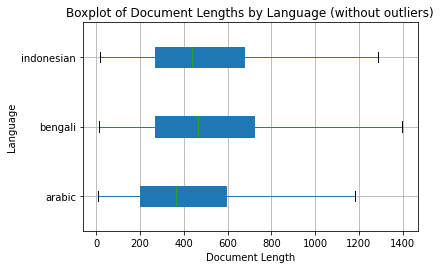

In [5]:
from matplotlib import pyplot as plt

train_df['document_length'] = train_df['document_plaintext'].str.len()

# Remove outliers (singular train_df points) by using the showfliers=False parameter in the boxplot function
plt.figure(figsize=(15, 8))
boxplot = train_df.boxplot(column='document_length', by='language', grid=True, patch_artist=True, vert=False, showfliers=False)

# Set the title and labels
plt.title('Boxplot of Document Lengths by Language (without outliers)')
plt.suptitle('')  # Suppress the default title
plt.ylabel('Language')
plt.xlabel('Document Length')
plt.tight_layout()

plt.show()

<Figure size 1080x576 with 0 Axes>

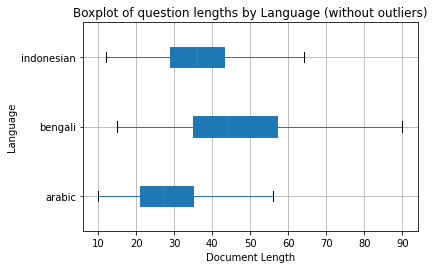

In [6]:
from matplotlib import pyplot as plt

train_df['question_length'] = train_df['question_text'].str.len()

# Remove outliers (singular train_df points) by using the showfliers=False parameter in the boxplot function
plt.figure(figsize=(15, 8))
boxplot = train_df.boxplot(column='question_length', by='language', grid=True, patch_artist=True, vert=False, showfliers=False)

# Set the title and labels
plt.title('Boxplot of question lengths by Language (without outliers)')
plt.suptitle('')  # Suppress the default title
plt.ylabel('Language')
plt.xlabel('Document Length')
plt.tight_layout()

plt.show()

Means:
            is_answerable  document_length  word_count
language                                              
arabic           0.500203       474.587607   78.188661
bengali          0.500105       554.566227   79.929902
indonesian       0.500439       529.921011   72.397578

Medians::
            is_answerable  document_length  word_count
language                                              
arabic                1.0            364.0        60.0
bengali               1.0            467.0        66.0
indonesian            1.0            439.0        60.0


<Figure size 720x432 with 0 Axes>

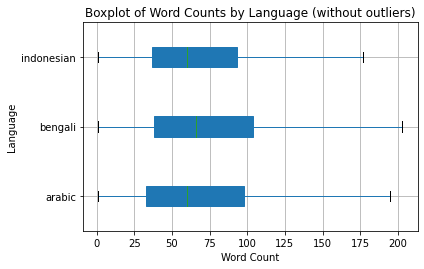

In [100]:
train_df['word_count'] = train_df['document_plaintext'].str.split().str.len()
print(f"Means:\n{train_df.groupby('language').mean()}", end='\n\n')
print(f"Medians::\n{train_df.groupby('language').median()}")


plt.figure(figsize=(10, 6))
boxplot = train_df.boxplot(column='word_count', by='language', grid=True, patch_artist=True, vert=False, showfliers=False)

# Set the title and labels
plt.title('Boxplot of Word Counts by Language (without outliers)')
plt.suptitle('')  # Suppress the default title
plt.ylabel('Language')
plt.xlabel('Word Count')
plt.tight_layout()

plt.show()


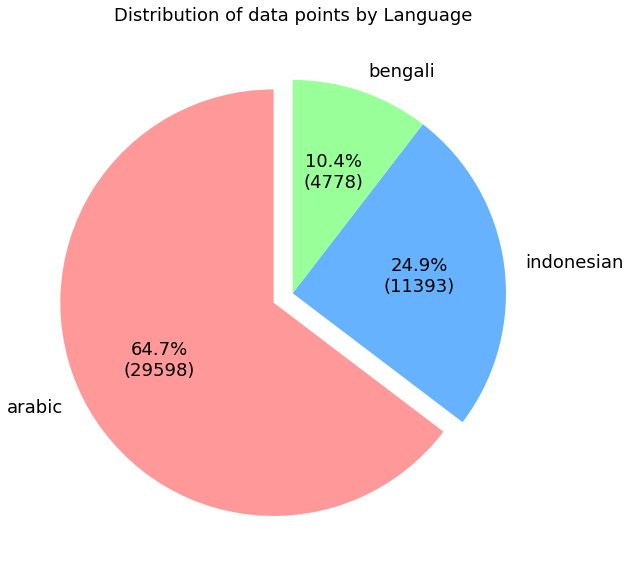

In [113]:
# Count the number of datapoints for each language
language_counts = train_df['language'].value_counts()

# Function to display both percentage and actual count
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{pct:.1f}%\n({absolute:d})"

# Create a pie chart of the distribution of datapoints by language with specific count for each language
plt.figure(figsize=(8, 8))
language_counts.plot.pie(autopct=lambda pct: func(pct, language_counts), 
                         startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99'], explode=(0.1, 0, 0))
plt.title('Distribution of data points by Language', fontsize=18)
plt.ylabel('')  # Remove the default ylabel

plt.gca().set_aspect("equal")  # Ensure the pie chart is a circle
plt.tight_layout()  # Ensure the labels don't overlap

# Adjust the font size of the text labels
for text in plt.gca().texts:
    text.set_fontsize(18)
plt.savefig("piechart.png", bbox_inches='tight')
plt.show()




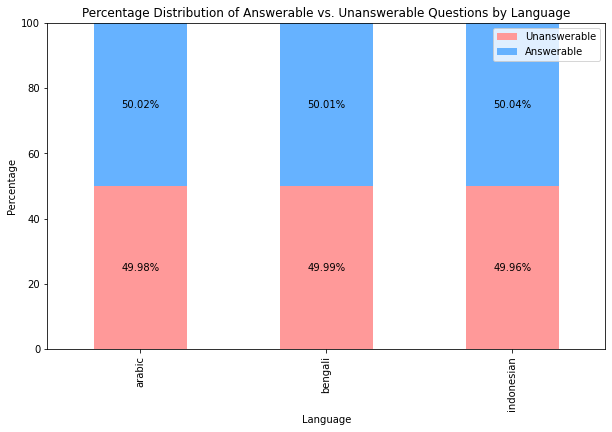

In [82]:

train_df['is_answerable'] = train_df['annotations'].apply(lambda x: x.get('answer_start', [-1])[0] != -1)

final_answerable_counts = train_df.groupby('language')['is_answerable'].value_counts().unstack().fillna(0)

final_answerable_percentage = (final_answerable_counts.T / final_answerable_counts.sum(axis=1)).T * 100

final_percentage_plot = final_answerable_percentage.plot.bar(stacked=True, figsize=(10, 6), color=['#FF9999', '#66B2FF'])
plt.title('Percentage Distribution of Answerable vs. Unanswerable Questions by Language')
plt.xlabel('Language')
plt.ylabel('Percentage')
plt.legend(['Unanswerable', 'Answerable'], loc='upper right')
plt.ylim(0, 100)  # Set y-axis limits to 0-100 for clarity

for p in final_percentage_plot.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 5:  # Only annotate if the height is large enough to be visible
        final_percentage_plot.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()



In [94]:
unique_question_percentage

language
arabic        50.020272
bengali       49.717514
indonesian    50.043883
dtype: float64

In [77]:
unique_question_counts

0.5002512507919862

In [79]:
(final_answerable_counts.T / final_answerable_counts.sum(axis=1)).T * 100

is_answerable,False,True
language,,
arabic,49.979728,50.020272
bengali,49.989538,50.010462
indonesian,49.956117,50.043883


Create oracle function and rulebased classifier

In [41]:
def oracle_eval(row):
    answer = row['annotations']['answer_text'][0]
    return bool(answer) and answer in row['document_plaintext']

def rule_based_classifier(row, threshold=0.5):
    ## count how many words in the question appear in the document
    question_words = row['question_text'].split()
    document_words = row['document_plaintext'].split()
    count = 0
    for word in question_words:
        if word in document_words:
            count += 1
    count = count / len(question_words)
    if count >= threshold:
        return True
    else:
        return False
            

Find the best threshold

In [87]:
scores = []

for thresh in [i/100 for i in range(5, 100)]:
    count = 0
    for row in train_df.iterrows():
        if rule_based_classifier(row[1], thresh) == oracle_eval(row[1]):
            count += 1
    print("Score for threshold", thresh, "is", count/len(train_df))
    scores.append([thresh, count/len(train_df)])

Score for threshold 0.05 is 0.6698127635402329
Score for threshold 0.06 is 0.6699001551200542
Score for threshold 0.07 is 0.6699875466998755
Score for threshold 0.08 is 0.6705774398636691
Score for threshold 0.09 is 0.6713639640820607
Score for threshold 0.1 is 0.6726311419894693
Score for threshold 0.11 is 0.6747066920102248
Score for threshold 0.12 is 0.6787048567870486
Score for threshold 0.13 is 0.6847785715846278
Score for threshold 0.14 is 0.6848004194795831
Score for threshold 0.15 is 0.6940202311507286
Score for threshold 0.16 is 0.6943697974700138
Score for threshold 0.17 is 0.7077188612877149
Score for threshold 0.18 is 0.7077407091826703
Score for threshold 0.19 is 0.7080684276070001
Score for threshold 0.2 is 0.7080684276070001
Score for threshold 0.21 is 0.7196915077232309
Score for threshold 0.22 is 0.7196915077232309
Score for threshold 0.23 is 0.7204124882567564
Score for threshold 0.24 is 0.7206746629962203
Score for threshold 0.25 is 0.7206746629962203
Score for thres

Validate threshold

In [94]:
best_thresh, train_acc = scores[np.array(scores).argmax(0)[1]]
count = 0
for row in val_df.iterrows():
    if rule_based_classifier(row[1], best_thresh) == oracle_eval(row[1]):
        count += 1
print(f"Validation accuracy: {count/len(val_df)}")
print(f"Train accuracy: {train_acc}")

Validation accuracy: 0.7286704853783539
Train accuracy: 0.7206746629962203
